In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os

import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import fig_utils 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
base_dir = os.path.join('sl_results','23Aug22','1')
bulk_dir = os.path.join('sl_results','28Aug22','1')
sfai_dir = os.path.join('sl_results','28Aug22','1')

# plot type = '' (main text), _bulk, _sfai
plot_types = ['']
plot_type = ''
fs = []

for pt in plot_types:

    if pt == '':
        path_zt = os.path.join(base_dir,'starrydata_zt','starrydata_zt-1-496-55-90-100.csv')
        path_tc = os.path.join(base_dir,'starrydata_tc','starrydata_tc-1-496-55-0-10.csv')
        path_sigma = os.path.join(base_dir,'starrydata_sigma','starrydata_sigma-1-559-62-90-100.csv')
        
    if pt == '_bulk':
        path_zt = os.path.join(bulk_dir,'starrydata_zt_bulk','starrydata_zt_bulk-1-218-24-90-100.csv')
        path_tc = os.path.join(bulk_dir,'starrydata_tc_bulk','starrydata_tc_bulk-1-211-23-0-10.csv')
        path_sigma = os.path.join(bulk_dir,'starrydata_sigma_bulk','starrydata_sigma_bulk-1-234-26-90-100.csv')

    if pt == '_sfai':
        path_zt = os.path.join(sfai_dir,'starrydata_zt_sfai','starrydata_zt_sfai-1-524-58-90-100.csv')
        path_tc = os.path.join(sfai_dir,'starrydata_tc_sfai','starrydata_tc_sfai-1-518-57-0-10.csv')
        path_sigma = os.path.join(sfai_dir,'starrydata_sigma_sfai','starrydata_sigma_sfai-1-587-65-90-100.csv')

        
    fs.extend([path_zt, path_tc, path_sigma])
    

In [7]:
print(fs)

['sl_results/23Aug22/1/starrydata_zt/starrydata_zt-1-496-55-90-100.csv', 'sl_results/23Aug22/1/starrydata_tc/starrydata_tc-1-496-55-0-10.csv', 'sl_results/23Aug22/1/starrydata_sigma/starrydata_sigma-1-559-62-90-100.csv']


This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]

File:  sl_results/23Aug22/1/starrydata_zt/starrydata_zt-1-496-55-90-100.csv
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # of targets 49 49
arrary sliced: iterations > # 

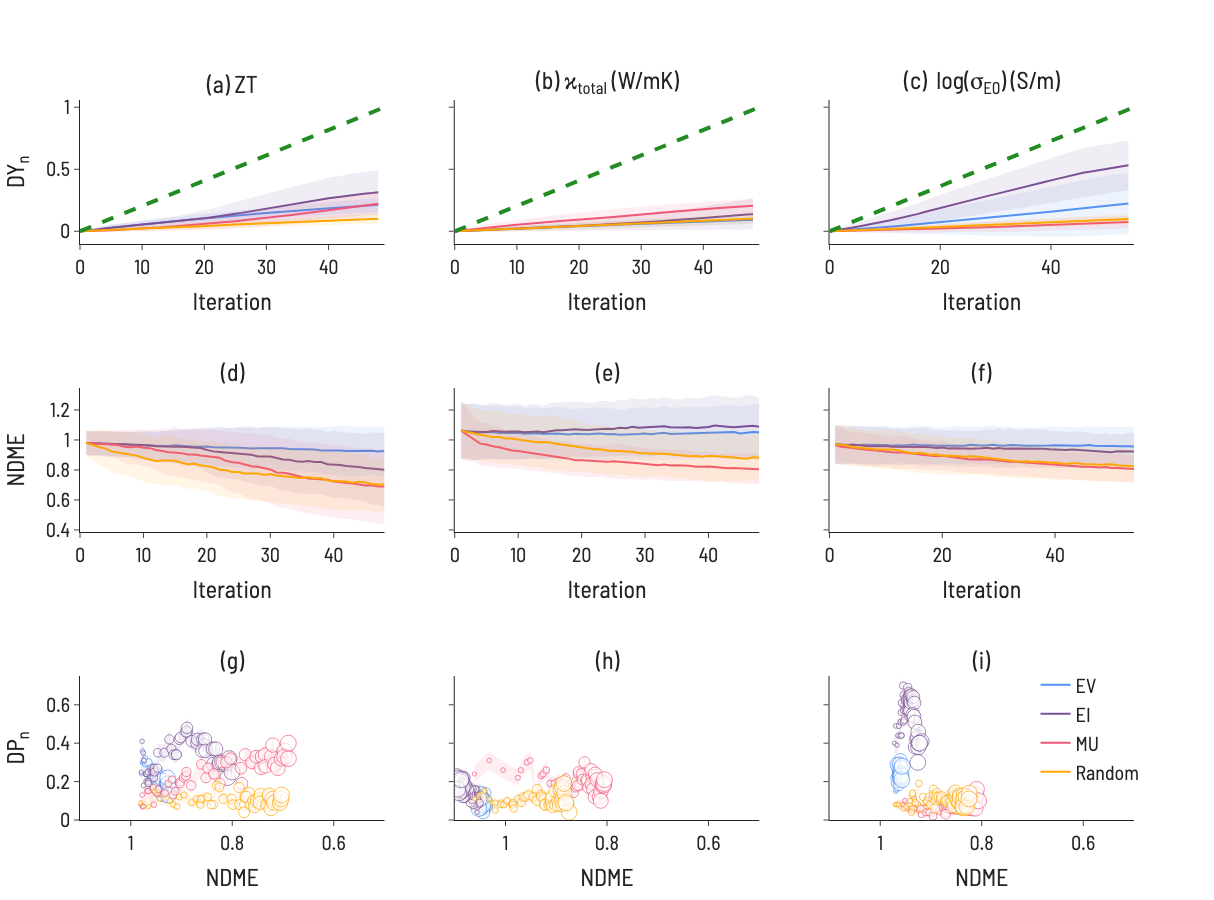

In [18]:
fig = make_subplots(
    rows=3, cols=3,
#     specs=[[{}, {'rowspan':2}],
#            [{}, None]],
    print_grid=True,
    shared_yaxes=True,
    vertical_spacing=0.2,
    subplot_titles=['(a) ZT', '(b) &#954;<sub>total</sub> (W/mK)', '(c)  log(&#963;<sub>E0</sub>) (S/m)',
                   '(d)', '(e)', '(f)',
                    '(g)', '(h)', '(i)',
                   ]
)

count = 1
for f in fs:

    # this is just to only show one set of legends
    if 'zt' in f:
        dp_traces = fig_utils.get_discovery_probability_traces([f], x_metric='NDME', legend=False)
        i1_traces = fig_utils.get_avg_and_std_trace(f, 'fraction_of_targets_found', legend=True)
        i2_traces = fig_utils.get_avg_and_std_trace(f, 'NDME', legend=False)
    else:
        dp_traces = fig_utils.get_discovery_probability_traces([f], x_metric='NDME', legend=False)
        i1_traces = fig_utils.get_avg_and_std_trace(f, 'fraction_of_targets_found', legend=False)
        i2_traces = fig_utils.get_avg_and_std_trace(f, 'NDME', legend=False)
        
    for it in i1_traces:
        fig.add_trace(it, row=1, col=count)

    for it in i2_traces:
        fig.add_trace(it, row=2, col=count)
    
    for ft in dp_traces:
        fig.add_trace(ft, row=3, col=count)
        
    count += 1
    
    # a perfect selection strategy would select a candidate at every iteration
    ## for Eg dataset n_targets = 215
    total_targets = fig_utils.get_total_targets(pd.read_csv(f))
    benchmark_x_vals = np.linspace(0,total_targets)
    slope = 1/total_targets
    print('Total tagets: {} {}'.format(total_targets, slope))
    benchmark_y_vals = slope * benchmark_x_vals
    benchmark_trace = go.Scatter(x=benchmark_x_vals, y=benchmark_y_vals, name='perfect SL strategy', 
                                 line = dict(color='forestgreen', width=4, dash='dash'),
                                showlegend=False
    )
    
    if 'zt' in f:
        fig.add_trace(benchmark_trace, row=1, col=1)
    elif 'tc' in f:
        fig.add_trace(benchmark_trace, row=1, col=2)
    elif 'sigma' in f:
        fig.add_trace(benchmark_trace, row=1, col=3)

fig.update_yaxes(title_text='DY<sub>n</sub>', row=1, col=1)
fig.update_yaxes(title_text='NDME', row=2, col=1)
fig.update_yaxes(title_text='DP<sub>n</sub>', row=3, col=1)

fig.update_yaxes(range=[0, 0.5], row=3, col=1)
fig.update_yaxes(range=[0, 0.5], row=3, col=2)
fig.update_yaxes(range=[0, 0.5], row=3, col=3)


for i in [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3)]:
    fig.update_xaxes(title_text='Iteration', row=i[0], col=i[1])

for col in [1,2,3]:
    fig.update_xaxes(title_text='NDME', range=[1.1, 0.5], row=3, col=col)
    fig.update_yaxes(range=[0, 0.75], row=3, col=col)


fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.04,
    xanchor="right",
    x=1.01
))
fig.layout.legend.tracegroupgap = 0

fig.update_annotations(font=dict(family="Barlow Semi Condensed", size=24))
fig.update_layout(font=dict(family="Barlow Semi Condensed", size=20), width=1000, height=900,  showlegend=True)
fig.write_image(os.path.join("static","fig6-sl_metrics-starrydata{}.png".format(plot_type)), scale=2)
fig.show()